In [252]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import calendar
os.chdir(r"C:\Users\jcmar\Desktop\RUTJC201904DATA3\TableauHW")

In [44]:
#Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable. 
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [45]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [87]:
# Make a reference to the file path
csv_path = "combined_csv.csv"

# Import the combined_csv file as a DataFrame
citibike_df = pd.read_csv(csv_path, encoding="utf-8")
citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [88]:
# Select Relevant Columns in new dataframe
citibike = citibike_df[['tripduration', 'starttime','stoptime', 'start station latitude', 'start station longitude', 
                                                 'usertype', 'birth year', 'gender']].copy()
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,40.778968,-73.973747,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,40.751873,-73.977706,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,40.785247,-73.976673,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,40.732219,-73.981656,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,40.727434,-73.993790,Subscriber,1979,1


In [89]:
#Change gender to Unknown (0), Male (1), Female (2) - Per Citibike Data
citibike['gender'].replace([0,1,2],['Unknown','Male','Female'],inplace=True)
# # convert tripduration from seconds to minutes
# citibike['tripduration'] = (citibike['tripduration'] / 60).round(2)
#subtract birth year by 2019 to ascertain age of rider
citibike['birth year'] = citibike['birth year'] - 2019
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,40.778968,-73.973747,Subscriber,-48,Male
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,40.751873,-73.977706,Subscriber,-55,Male
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,40.785247,-73.976673,Subscriber,-32,Male
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,40.732219,-73.981656,Subscriber,-29,Male
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,40.727434,-73.993790,Subscriber,-40,Male


In [90]:
#convert birth year negative numbers into positive numbers
citibike['birth year2'] = citibike['birth year']*-1
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,40.727434,-73.993790,Subscriber,-40,Male,40


In [91]:
#Change StartTime to Year and Time Column and Month to Month Column
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'])
citibike.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,40.727434,-73.993790,Subscriber,-40,Male,40


In [92]:
# Rename comlumns
citibike2 = citibike.rename(columns={'birth year2': 'age'})
citibike2.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,age
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,40.727434,-73.993790,Subscriber,-40,Male,40


In [93]:
#Extract Month, Day of the Week, Time from startime column and stoptime column and drop birth year
citibike2 = citibike2[['tripduration', 'starttime','start station latitude', 'start station longitude', 
                                                 'usertype', 'gender', 'age']].copy()
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age
0,320,2019-01-01 00:01:47.401,40.778968,-73.973747,Subscriber,Male,48
1,316,2019-01-01 00:04:43.736,40.751873,-73.977706,Subscriber,Male,55
2,591,2019-01-01 00:06:03.997,40.785247,-73.976673,Subscriber,Male,32
3,2719,2019-01-01 00:07:03.545,40.732219,-73.981656,Subscriber,Male,29
4,303,2019-01-01 00:07:35.945,40.727434,-73.993790,Subscriber,Male,40


In [255]:
#Remove all A
citibike_final = citibike2.loc[citibike2["age"] < 100]
citibike_final.head()

,tripduration,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [256]:
citibike_final['starttime'] = pd.to_datetime(citibike_final['starttime'])
citibike_final.head()

KeyError: 'starttime'

In [103]:
#Add Year to Year Column and Month to Month Column
citibike2['starttime - Day'] = citibike2['starttime'].dt.day
citibike2['starttime - Month'] = citibike2['starttime'].dt.month_name()
citibike2['starttime - Time'] = citibike2['starttime'].dt.time
citibike2['starttime - Weekday'] = citibike2['starttime'].dt.weekday
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,2019-01-01 00:01:47.401,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,1
1,316,2019-01-01 00:04:43.736,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,1
2,591,2019-01-01 00:06:03.997,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,1
3,2719,2019-01-01 00:07:03.545,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,1
4,303,2019-01-01 00:07:35.945,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,1


In [111]:
#Replace Weekday Numbers with Days of the Week
citibike2['starttime - Weekday'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)
citibike2.head()

,tripduration,starttime,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,2019-01-01 00:01:47.401,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,2019-01-01 00:04:43.736,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,2019-01-01 00:06:03.997,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,2019-01-01 00:07:03.545,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,2019-01-01 00:07:35.945,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [112]:
#Drop Starttime and Stoptime Columns
citibike2.drop(columns=["starttime"], inplace=True)
citibike2.head()

,tripduration,start station latitude,start station longitude,usertype,gender,age,starttime - Day,starttime - Month,starttime - Time,starttime - Weekday
0,320,40.778968,-73.973747,Subscriber,Male,48,1,January,00:01:47.401000,Tuesday
1,316,40.751873,-73.977706,Subscriber,Male,55,1,January,00:04:43.736000,Tuesday
2,591,40.785247,-73.976673,Subscriber,Male,32,1,January,00:06:03.997000,Tuesday
3,2719,40.732219,-73.981656,Subscriber,Male,29,1,January,00:07:03.545000,Tuesday
4,303,40.727434,-73.993790,Subscriber,Male,40,1,January,00:07:35.945000,Tuesday


In [142]:
#Value Count of Starttime - Weekday Trips
weekdaytrips_df = citibike2['starttime - Weekday'].value_counts().reset_index().rename(columns={'index': 'Weekday', "starttime - Weekday": 'Count'})
weekdaytrips_df["Weekday Number"] = (2, 1, 4, 3, 0, 5, 6)
weekdaytrips_df = weekdaytrips_df.sort_values('Weekday Number',ascending=True)
weekdaytrips_df

,Weekday,Count,Weekday Number
4,Monday,1574679,0
1,Tuesday,1726600,1
0,Wednesday,1835612,2
3,Thursday,1594283,3
2,Friday,1683704,4
5,Saturday,1512136,5
6,Sunday,1309068,6


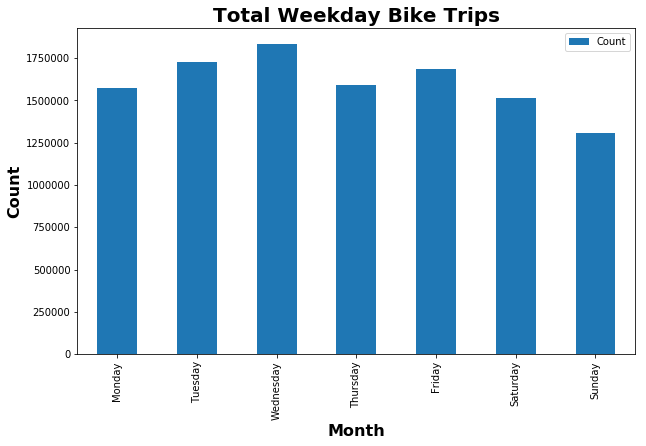

In [169]:
#Bar Graph for Monthly Trips
weekdaytrips_df.plot.bar(x= 'Weekday', y = 'Count')
plt.rcParams['figure.figsize'] = (10,6)
plt.xlabel('Month', fontweight="bold", fontsize=16)
plt.ylabel('Count', fontweight="bold", fontsize=16)
plt.title('Total Weekday Bike Trips', fontweight="bold", fontsize=20)
plt.bar
fig1 = plt.gcf()

In [172]:
#Save Image of Graph
fig1.savefig("./Images/WeekdayCount.png")

In [156]:
#Value Count of Starttime - Weekday Trips
monthlytrips_df = citibike2['starttime - Month'].value_counts().reset_index().rename(columns={'index': 'Month', "starttime - Month": 'Count'})
monthlytrips_df["Month Number"] = (7,6,5,4,3,1,2)
monthlytrips_df = monthlytrips_df.sort_values('Month Number',ascending=True)
monthlytrips_df

,Month,Count,Month Number
5,January,967287,1
6,February,943744,2
4,March,1327960,3
3,April,1766094,4
2,May,1924563,5
1,June,2125370,6
0,July,2181064,7


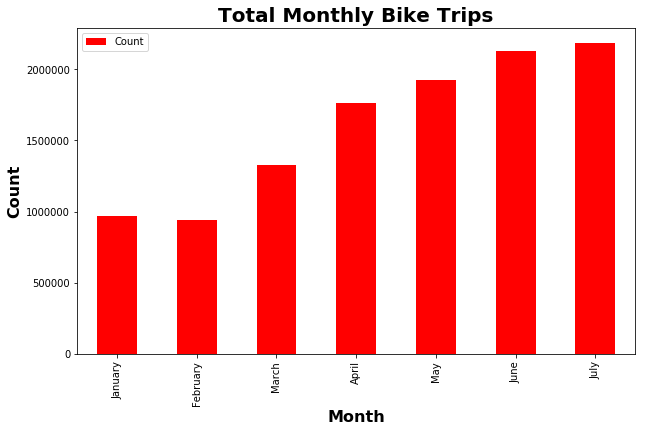

In [171]:
#Bar Graph for Monthly Trips
monthlytrips_df.plot.bar(x= 'Month', y = 'Count', color="r")
plt.rcParams['figure.figsize'] = (10,6)
plt.ylabel('Count', fontweight="bold", fontsize=16)
plt.xlabel('Month', fontweight="bold", fontsize=16)
plt.title('Total Monthly Bike Trips', fontweight="bold", fontsize=20)
plt.bar
fig1 = plt.gcf()

In [173]:
#Save Image of Graph
fig1.savefig("./Images/MonthlyBikeTrips.png")

In [175]:
#Gender
gender_df = citibike2["gender"].value_counts().reset_index().rename(columns={'index': 'Gender', "Gender": 'Count'})
gender_df.head()

,Gender,gender
0,Male,7745742
1,Female,2646723
2,Unknown,843617


In [199]:
#Creat Pie Graph for Male, Femal, Unknown
# Labels for the sections of our pie chart
labels = ["Male", "Female", "Unknown",]

# Pie Chart Values
sizes = [7745742, 2646723, 843617]

# The colors of each section of the pie chart
colors = ["#66b3ff", "#ff9999", "#99ff99"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, .1,.19)

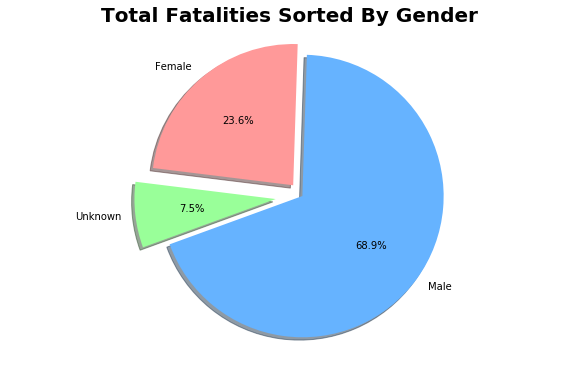

In [202]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Total Fatalities Sorted By Gender", fontweight="bold", fontsize=20)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
fig5 = plt.gcf()

In [203]:
#Save Image of Graph
fig1.savefig("./Images/TotalFatalitiesSortedbyGender.png")

In [245]:
agecheck = citibike.loc[citibike["birth year2"] < 100]
agecheck.head()

,tripduration,starttime,stoptime,start station latitude,start station longitude,usertype,birth year,gender,birth year2
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,40.778968,-73.973747,Subscriber,-48,Male,48
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,40.751873,-73.977706,Subscriber,-55,Male,55
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,40.785247,-73.976673,Subscriber,-32,Male,32
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,40.732219,-73.981656,Subscriber,-29,Male,29
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,40.727434,-73.993790,Subscriber,-40,Male,40
